In [1]:
import monai
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
import json
import os

 missing cuda symbols while dynamic loading
 cuFile initialization failed


In [2]:
data = pd.read_csv('/home/jaalzate/Prostate_Cancer_TFM/Files/Bounding_Boxes/Only_Bounding.csv')

In [4]:
path ="/nvmescratch/ceib/Prostate/Bounding_Boxes"

data = pd.read_csv('/home/jaalzate/Prostate_Cancer_TFM/Files/Bounding_Boxes/Only_Bounding.csv')
data_t2 = data[data.modality=="T2"].reset_index(drop=True)
data_t2['cropped_image'] = [os.path.join(path,'Cropped',*row.image_nifti.split('/')[-5:]) for i,row in data_t2.iterrows()]
data_t2['cropped_bounding_box'] = [os.path.join(path,'Cropped',row.bounding_box,os.listdir(os.path.join(path,'Cropped',row.bounding_box))[0]) for i,row in data_t2.iterrows()]
data_t2['bounding_box'] = data_t2['bounding_box'].apply(lambda x: os.path.join(path,x,os.listdir(os.path.join(path,x))[0]))

In [5]:
data_t2

,subject,session,image,image_associated,bounding_box,SeriesDescription,image_nifti,bval,bvec,modality,Path_Segmentation,cropped_image,cropped_bounding_box
0,5586,6040,p0052021/005586/006040/8/DICOM,p0052021/005586/006040/8/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,ax T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...
1,5586,6040,p0052021/005586/006040/7/DICOM,p0052021/005586/006040/7/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,Ax T2 ADENOPATIAS,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...
2,5596,6050,p0052021/005596/006050/13001/DICOM,p0052021/005596/006050/13001/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,AXIAL T2 TSE,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...
3,5700,6173,p0052021/005700/006173/6/DICOM,p0052021/005700/006173/6/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,AXIAL T2 ALTA RES. (de abajo arriba en próstata),/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...
4,5665,6131,p0052021/005665/006131/6/DICOM,p0052021/005665/006131/6/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,Ax T2 FSE,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,5636,6097,p0052021/005636/006097/501/DICOM,p0052021/005636/006097/501/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,T2W_TSE_TRA_IQ,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...
293,5613,6070,p0052021/005613/006070/6/DICOM,p0052021/005613/006070/6/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,AX T2 PROPELLER,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...
294,5646,6108,p0052021/005646/006108/7/DICOM,p0052021/005646/006108/7/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,Ax T2 FSE,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...
295,5399,5819,p0052021/005399/005819/701/DICOM,p0052021/005399/005819/701/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,T2W_TSE,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...


In [6]:
loader = monai.transforms.LoadImaged(keys=["bounding_box"], image_only=False)
data_t2['Segmenter'] = [data['bounding_box_meta_dict']['0008|103e'] for data in monai.data.Dataset(data=data_t2.to_dict('records'),transform=loader)]

In [7]:
valid_seg = ['SEG1-L', 'SEG2-L', 'SEG3-L', 'SEG2L']
data_t2 = data_t2[data_t2.Segmenter.isin(valid_seg)].reset_index(drop=True)

In [8]:
data_t2

,subject,session,image,image_associated,bounding_box,SeriesDescription,image_nifti,bval,bvec,modality,Path_Segmentation,cropped_image,cropped_bounding_box,Segmenter
0,5586,6040,p0052021/005586/006040/8/DICOM,p0052021/005586/006040/8/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,ax T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,SEG2-L
1,5586,6040,p0052021/005586/006040/7/DICOM,p0052021/005586/006040/7/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,Ax T2 ADENOPATIAS,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,SEG2-L
2,5596,6050,p0052021/005596/006050/13001/DICOM,p0052021/005596/006050/13001/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,AXIAL T2 TSE,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,SEG2-L
3,5700,6173,p0052021/005700/006173/6/DICOM,p0052021/005700/006173/6/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,AXIAL T2 ALTA RES. (de abajo arriba en próstata),/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,SEG2-L
4,5665,6131,p0052021/005665/006131/6/DICOM,p0052021/005665/006131/6/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,Ax T2 FSE,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,SEG2-L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,5636,6097,p0052021/005636/006097/501/DICOM,p0052021/005636/006097/501/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,T2W_TSE_TRA_IQ,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,SEG2-L
256,5613,6070,p0052021/005613/006070/6/DICOM,p0052021/005613/006070/6/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,AX T2 PROPELLER,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,SEG2-L
257,5646,6108,p0052021/005646/006108/7/DICOM,p0052021/005646/006108/7/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,Ax T2 FSE,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,SEG2-L
258,5399,5819,p0052021/005399/005819/701/DICOM,p0052021/005399/005819/701/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,T2W_TSE,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,SEG1-L


In [9]:
images = monai.transforms.LoadImaged(keys=['cropped_image','cropped_bounding_box','Path_Segmentation'],ensure_channel_first = True,image_only=False)(data_t2.iloc[11])
images = monai.transforms.CropForegroundd(keys=['cropped_image','cropped_bounding_box','Path_Segmentation'], source_key='Path_Segmentation',allow_smaller=False, margin=(0,0,1), k_divisible=(64,64,1))(images)

In [10]:
display(images['cropped_image_meta_dict'])

{'sizeof_hdr': array(348, dtype=int32),
 'extents': array(0, dtype=int32),
 'session_error': array(0, dtype=int16),
 'dim_info': array(0, dtype=uint8),
 'dim': array([  3, 308, 308,  26,   1,   1,   1,   1], dtype=int16),
 'intent_p1': array(0., dtype=float32),
 'intent_p2': array(0., dtype=float32),
 'intent_p3': array(0., dtype=float32),
 'intent_code': array(0, dtype=int16),
 'datatype': array(4, dtype=int16),
 'bitpix': array(16, dtype=int16),
 'slice_start': array(0, dtype=int16),
 'pixdim': array([-1.    ,  0.3906,  0.3906,  3.    ,  0.    ,  0.    ,  0.    ,
         0.    ], dtype=float32),
 'vox_offset': array(0., dtype=float32),
 'scl_slope': array(nan, dtype=float32),
 'scl_inter': array(nan, dtype=float32),
 'slice_end': array(0, dtype=int16),
 'slice_code': array(0, dtype=uint8),
 'xyzt_units': array(2, dtype=uint8),
 'cal_max': array(0., dtype=float32),
 'cal_min': array(0., dtype=float32),
 'slice_duration': array(0., dtype=float32),
 'toffset': array(0., dtype=float32),

invalid value encountered in cast


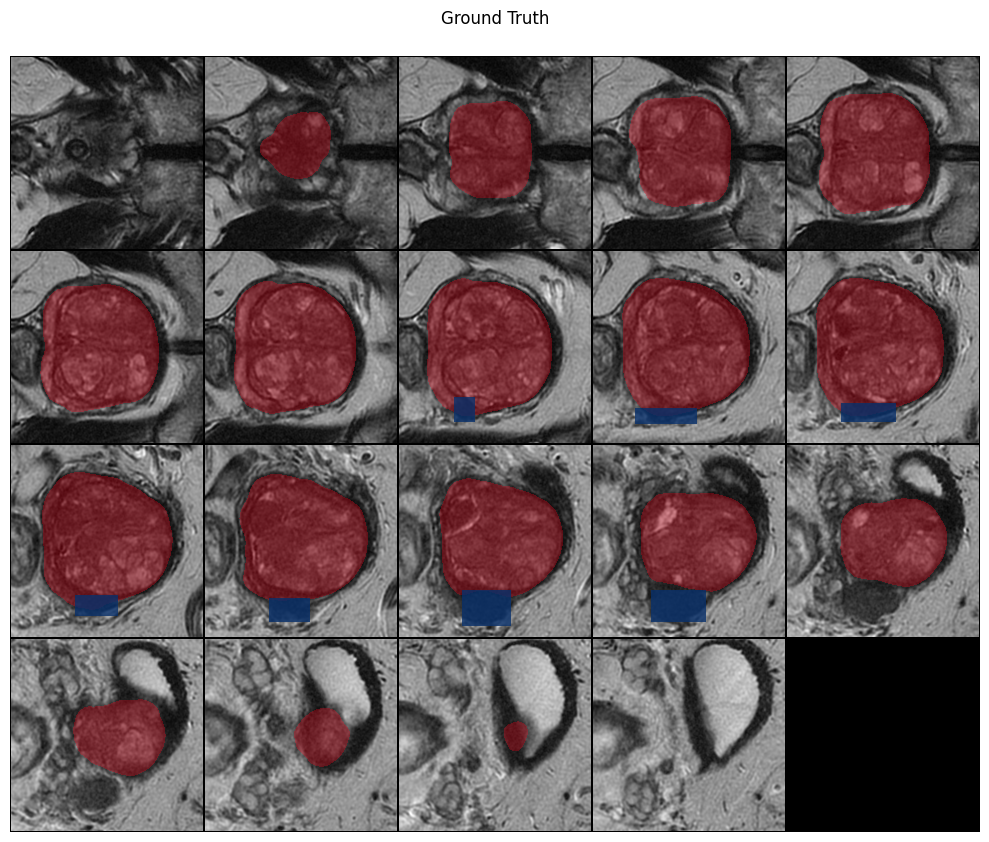

In [11]:
blended=monai.visualize.utils.blend_images(images['cropped_image'],images['Path_Segmentation'], alpha=0.3, cmap='hsv', rescale_arrays=True, transparent_background=True)
blended_2=monai.visualize.utils.blend_images(blended,images['cropped_bounding_box'], alpha=0.8, cmap='Blues', rescale_arrays=True, transparent_background=True)
monai.visualize.matshow3d(
    volume=blended_2,
    fig=None, title="Ground Truth",
    figsize=(10, 10),
    every_n=1,
    frame_dim=-1,
    show=True,
    channel_dim=0
)
plt.show()

In [12]:
data_t2

,subject,session,image,image_associated,bounding_box,SeriesDescription,image_nifti,bval,bvec,modality,Path_Segmentation,cropped_image,cropped_bounding_box,Segmenter
0,5586,6040,p0052021/005586/006040/8/DICOM,p0052021/005586/006040/8/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,ax T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,SEG2-L
1,5586,6040,p0052021/005586/006040/7/DICOM,p0052021/005586/006040/7/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,Ax T2 ADENOPATIAS,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,SEG2-L
2,5596,6050,p0052021/005596/006050/13001/DICOM,p0052021/005596/006050/13001/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,AXIAL T2 TSE,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,SEG2-L
3,5700,6173,p0052021/005700/006173/6/DICOM,p0052021/005700/006173/6/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,AXIAL T2 ALTA RES. (de abajo arriba en próstata),/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,SEG2-L
4,5665,6131,p0052021/005665/006131/6/DICOM,p0052021/005665/006131/6/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,Ax T2 FSE,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,SEG2-L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,5636,6097,p0052021/005636/006097/501/DICOM,p0052021/005636/006097/501/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,T2W_TSE_TRA_IQ,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,SEG2-L
256,5613,6070,p0052021/005613/006070/6/DICOM,p0052021/005613/006070/6/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,AX T2 PROPELLER,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,SEG2-L
257,5646,6108,p0052021/005646/006108/7/DICOM,p0052021/005646/006108/7/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,Ax T2 FSE,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,SEG2-L
258,5399,5819,p0052021/005399/005819/701/DICOM,p0052021/005399/005819/701/DICOM,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,T2W_TSE,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,NaN,NaN,T2,/nvmescratch/ceib/Prostate/Bounding_Boxes/p005...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,/nvmescratch/ceib/Prostate/Bounding_Boxes/Crop...,SEG1-L


In [13]:
images['cropped_bounding_box'].unique()

metatensor([  0., 255.])

In [16]:
# Saving nnDetection Format
data_path = '/nvmescratch/ceib/Prostate/nnDetection/det_data'
project_name = 'Task101_ProstateOwnData'

# Create the folders
train_images_folder = os.path.join(data_path, project_name, 'raw_splitted', 'imagesTr')
train_labels_folder = os.path.join(data_path, project_name, 'raw_splitted', 'labelsTr')

os.makedirs(train_images_folder, exist_ok=True)
os.makedirs(train_labels_folder, exist_ok=True)

# Save the images and labels
for i, row in data_t2.iterrows():
    # Save the images
    images = monai.transforms.LoadImaged(keys=['cropped_image','cropped_bounding_box','Path_Segmentation'],ensure_channel_first = True,image_only=True)(row)
    images = monai.transforms.CropForegroundd(keys=['cropped_image','cropped_bounding_box','Path_Segmentation'], source_key='Path_Segmentation',allow_smaller=False, margin=(0,0,1), k_divisible=(64,64,1))(images)
    
    images['cropped_image'].meta['filename_or_obj'] = os.path.join(train_images_folder, f"case{i}.nii.gz")
    images['cropped_bounding_box'].meta['filename_or_obj'] = os.path.join(train_images_folder, f"case{i}.nii.gz")
    images['cropped_bounding_box'] /= 255

    monai.transforms.SaveImaged(keys=['cropped_image'], meta_keys=['filename_or_obj'], output_postfix= '0000', output_dir=train_images_folder, separate_folder=False)(images)
    monai.transforms.SaveImaged(keys=['cropped_bounding_box'], meta_keys=['filename_or_obj'], output_postfix= '', output_dir=train_labels_folder, separate_folder=False)(images)

    # Create case.json
    if len(images['cropped_bounding_box'].unique()) > 1:
        dict_json = {
            "instances":
            {
                "1": 0
            }
        }
    else:
        dict_json = {
            "instances":{}
        }
    with open(os.path.join(train_labels_folder, f"case{i}.json"), 'w') as json_file:
        json.dump(dict_json, json_file, indent=4)


2024-03-11 10:44:36,373 INFO image_writer.py:197 - writing: /nvmescratch/ceib/Prostate/nnDetection/det_data/Task101_ProstateOwnData/raw_splitted/imagesTr/case0_0000.nii.gz
2024-03-11 10:44:36,417 INFO image_writer.py:197 - writing: /nvmescratch/ceib/Prostate/nnDetection/det_data/Task101_ProstateOwnData/raw_splitted/labelsTr/case0.nii.gz
2024-03-11 10:44:36,670 INFO image_writer.py:197 - writing: /nvmescratch/ceib/Prostate/nnDetection/det_data/Task101_ProstateOwnData/raw_splitted/imagesTr/case1_0000.nii.gz
2024-03-11 10:44:36,782 INFO image_writer.py:197 - writing: /nvmescratch/ceib/Prostate/nnDetection/det_data/Task101_ProstateOwnData/raw_splitted/labelsTr/case1.nii.gz
2024-03-11 10:44:36,945 INFO image_writer.py:197 - writing: /nvmescratch/ceib/Prostate/nnDetection/det_data/Task101_ProstateOwnData/raw_splitted/imagesTr/case2_0000.nii.gz
2024-03-11 10:44:36,959 INFO image_writer.py:197 - writing: /nvmescratch/ceib/Prostate/nnDetection/det_data/Task101_ProstateOwnData/raw_splitted/label

In [18]:

# Saving nnDetection Format Only Bounding
data_path = '/nvmescratch/ceib/Prostate/nnDetection/det_data'
project_name = 'Task102_ProstateOwnDataOnlyBouding'

# Create the folders
train_images_folder = os.path.join(data_path, project_name, 'raw_splitted', 'imagesTr')
train_labels_folder = os.path.join(data_path, project_name, 'raw_splitted', 'labelsTr')

os.makedirs(train_images_folder, exist_ok=True)
os.makedirs(train_labels_folder, exist_ok=True)

# Save the images and labels
for i, row in data_t2.iterrows():
    # Save the images
    

    images = monai.transforms.LoadImaged(keys=['cropped_image','cropped_bounding_box','Path_Segmentation'],ensure_channel_first = True,image_only=True)(row)
    images = monai.transforms.CropForegroundd(keys=['cropped_image','cropped_bounding_box','Path_Segmentation'], source_key='Path_Segmentation',allow_smaller=False, margin=(0,0,1), k_divisible=(64,64,1))(images)
    if len(images['cropped_bounding_box'].unique()) > 1:
        images['cropped_image'].meta['filename_or_obj'] = os.path.join(train_images_folder, f"case{i}.nii.gz")
        images['cropped_bounding_box'].meta['filename_or_obj'] = os.path.join(train_images_folder, f"case{i}.nii.gz")
        images['cropped_bounding_box'] /= 255

        monai.transforms.SaveImaged(keys=['cropped_image'], meta_keys=['filename_or_obj'], output_postfix= '0000', output_dir=train_images_folder, separate_folder=False)(images)
        monai.transforms.SaveImaged(keys=['cropped_bounding_box'], meta_keys=['filename_or_obj'], output_postfix= '', output_dir=train_labels_folder, separate_folder=False)(images)

        # Create case.json
        dict_json = {
            "instances":
            {
                "1": 0
            }
        }
        with open(os.path.join(train_labels_folder, f"case{i}.json"), 'w') as json_file:
            json.dump(dict_json, json_file, indent=4)
    else:
        continue


2024-03-11 11:14:04,186 INFO image_writer.py:197 - writing: /nvmescratch/ceib/Prostate/nnDetection/det_data/Task102_ProstateOwnDataOnlyBouding/raw_splitted/imagesTr/case0_0000.nii.gz
2024-03-11 11:14:04,242 INFO image_writer.py:197 - writing: /nvmescratch/ceib/Prostate/nnDetection/det_data/Task102_ProstateOwnDataOnlyBouding/raw_splitted/labelsTr/case0.nii.gz
2024-03-11 11:14:04,480 INFO image_writer.py:197 - writing: /nvmescratch/ceib/Prostate/nnDetection/det_data/Task102_ProstateOwnDataOnlyBouding/raw_splitted/imagesTr/case1_0000.nii.gz
2024-03-11 11:14:04,578 INFO image_writer.py:197 - writing: /nvmescratch/ceib/Prostate/nnDetection/det_data/Task102_ProstateOwnDataOnlyBouding/raw_splitted/labelsTr/case1.nii.gz
2024-03-11 11:14:04,721 INFO image_writer.py:197 - writing: /nvmescratch/ceib/Prostate/nnDetection/det_data/Task102_ProstateOwnDataOnlyBouding/raw_splitted/imagesTr/case2_0000.nii.gz
2024-03-11 11:14:04,737 INFO image_writer.py:197 - writing: /nvmescratch/ceib/Prostate/nnDetect

In [16]:
monai.transforms.LoadImage()('/nvmescratch/ceib/Prostate/nnDetection/det_data/Task101_ProstateOwnData/raw_splitted/imagesTr/case100_0000.nii.gz').shape

torch.Size([192, 128, 17])

In [20]:
%%writefile /nvmescratch/ceib/Prostate/nnDetection/det_data/Task102_ProstateOwnDataOnlyBouding/dataset.yaml

task: Task101_ProstateOwnData

name: "ProstateOwnOnlyBounding" # [Optional]
dim: 3 

test_labels: False # manually splitted test set

labels: # classes of data set; need to start at 0
    "0": "Lesion"

modalities: # modalities of data set; need to start at 0
    "0": "T2w"

Writing /nvmescratch/ceib/Prostate/nnDetection/det_data/Task102_ProstateOwnDataOnlyBouding/dataset.yaml


# Saving PICAI

In [80]:
import nibabel as nib

In [84]:
df = pd.read_csv('/home/jaalzate/Prostate_Cancer_TFM/Files/PICAI/partition_1_cv.csv')

In [86]:
df.columns

Index(['index', 'patient_id', 'study_id', 'mri_date', 'patient_age', 'psa',
       'psad', 'prostate_volume', 'histopath_type', 'lesion_GS', 'lesion_ISUP',
       'case_ISUP', 'case_csPCa', 'label', 'filepath_t2w_mha',
       'filepath_adc_mha', 'filepath_cor_mha', 'filepath_hbv_mha',
       'filepath_sag_mha', 'filepath_t2w_nifti', 'filepath_adc_nifti',
       'filepath_hbv_nifti', 'filepath_t2w_cropped', 'filepath_label_cropped',
       'filepath_label_gland', 'filepath_label_lesion',
       'filepath_label_lesion_AI', 'filepath_adc_cropped',
       'filepath_hbv_cropped', 'depth', 'heigth', 'weigth', 'partition',
       'human_labeled', 'filepath_labelAI_cropped', 'filepath_seg_zones',
       'filepath_seg_zones_cropped', 'PIRADS', 'cv_partition', 'Fold 0',
       'Fold 1', 'Fold 2', 'Fold 3', 'Fold 4'],
      dtype='object')

In [88]:
df = pd.read_csv('/home/jaalzate/Prostate_Cancer_TFM/Files/PICAI/partition_1_cv.csv')
format_load = "nifti"  #'nifti', mha, cropped
df["depth"] = df["filepath_t2w_" + format_load].apply(lambda path_file: nib.load(path_file).shape[0])
df["heigth"] = df["filepath_t2w_" + format_load].apply(lambda path_file: nib.load(path_file).shape[1])
df["weigth"] = df["filepath_t2w_" + format_load].apply(lambda path_file: nib.load(path_file).shape[2])
df = df[(df["heigth"] != 0) & (df["depth"] != 0)]
df = df[df["filepath_t2w_" + format_load].notna()].reset_index()

df = df[(df["heigth"] > 96) & (df["depth"] > 96)]

data_picai = df

data_picai_human = data_picai[data_picai["human_labeled"] == 1]
data_picai.drop(data_picai_human.index, inplace=True)

data_picai = data_picai[
    [
        "filepath_t2w_" + format_load,
        "filepath_adc_" + format_load,
        "filepath_hbv_" + format_load,
        "filepath_label_lesion_AI",
        "filepath_label_gland",
        "partition",
    ]
]
data_picai_human = data_picai_human[
    [
        "filepath_t2w_" + format_load,
        "filepath_adc_" + format_load,
        "filepath_hbv_" + format_load,
        "filepath_label_lesion",
        "filepath_label_gland",
        "partition",
    ]
]

df = pd.DataFrame(
    {
        "t2w": list(data_picai["filepath_t2w_" + format_load].values)
        + list(data_picai_human["filepath_t2w_" + format_load].values),
        "adc": list(data_picai["filepath_adc_" + format_load].values)
        + list(data_picai_human["filepath_adc_" + format_load].values),
        "dwi": list(data_picai["filepath_hbv_" + format_load].values)
        + list(data_picai_human["filepath_hbv_" + format_load].values),
        "zones": list(data_picai["filepath_label_gland"].values) + list(data_picai_human["filepath_label_gland"].values),
        "label": list(data_picai["filepath_label_lesion_AI"].values) + list(data_picai_human["filepath_label_lesion"].values),
        "partition": list(data_picai["partition"].values) + list(data_picai_human["partition"].values),
    }
)

In [90]:
df

,t2w,adc,dwi,zones,label,partition
0,/nvmescratch/ceib/Prostate/input/images_nii/10...,/nvmescratch/ceib/Prostate/input/images_nii/10...,/nvmescratch/ceib/Prostate/input/images_nii/10...,/nvmescratch/ceib/Prostate/input/labels/anatom...,/nvmescratch/ceib/Prostate/input/labels/csPCa_...,test
1,/nvmescratch/ceib/Prostate/input/images_nii/10...,/nvmescratch/ceib/Prostate/input/images_nii/10...,/nvmescratch/ceib/Prostate/input/images_nii/10...,/nvmescratch/ceib/Prostate/input/labels/anatom...,/nvmescratch/ceib/Prostate/input/labels/csPCa_...,test
2,/nvmescratch/ceib/Prostate/input/images_nii/11...,/nvmescratch/ceib/Prostate/input/images_nii/11...,/nvmescratch/ceib/Prostate/input/images_nii/11...,/nvmescratch/ceib/Prostate/input/labels/anatom...,/nvmescratch/ceib/Prostate/input/labels/csPCa_...,tr
3,/nvmescratch/ceib/Prostate/input/images_nii/11...,/nvmescratch/ceib/Prostate/input/images_nii/11...,/nvmescratch/ceib/Prostate/input/images_nii/11...,/nvmescratch/ceib/Prostate/input/labels/anatom...,/nvmescratch/ceib/Prostate/input/labels/csPCa_...,dev
4,/nvmescratch/ceib/Prostate/input/images_nii/10...,/nvmescratch/ceib/Prostate/input/images_nii/10...,/nvmescratch/ceib/Prostate/input/images_nii/10...,/nvmescratch/ceib/Prostate/input/labels/anatom...,/nvmescratch/ceib/Prostate/input/labels/csPCa_...,dev
...,...,...,...,...,...,...
1488,/nvmescratch/ceib/Prostate/input/images_nii/10...,/nvmescratch/ceib/Prostate/input/images_nii/10...,/nvmescratch/ceib/Prostate/input/images_nii/10...,/nvmescratch/ceib/Prostate/input/labels/anatom...,/nvmescratch/ceib/Prostate/input/labels/csPCa_...,test
1489,/nvmescratch/ceib/Prostate/input/images_nii/10...,/nvmescratch/ceib/Prostate/input/images_nii/10...,/nvmescratch/ceib/Prostate/input/images_nii/10...,/nvmescratch/ceib/Prostate/input/labels/anatom...,/nvmescratch/ceib/Prostate/input/labels/csPCa_...,test
1490,/nvmescratch/ceib/Prostate/input/images_nii/11...,/nvmescratch/ceib/Prostate/input/images_nii/11...,/nvmescratch/ceib/Prostate/input/images_nii/11...,/nvmescratch/ceib/Prostate/input/labels/anatom...,/nvmescratch/ceib/Prostate/input/labels/csPCa_...,test
1491,/nvmescratch/ceib/Prostate/input/images_nii/11...,/nvmescratch/ceib/Prostate/input/images_nii/11...,/nvmescratch/ceib/Prostate/input/images_nii/11...,/nvmescratch/ceib/Prostate/input/labels/anatom...,/nvmescratch/ceib/Prostate/input/labels/csPCa_...,tr


In [96]:
images = monai.transforms.LoadImaged(keys=['t2w','adc','dwi','zones','label'],ensure_channel_first = True,image_only=False)(df.iloc[20])
images = monai.transforms.ResampleToMatchd(
                    keys=["adc", "dwi", "zones", "label"], key_dst="t2w", mode=("bilinear", "bilinear", "nearest", "nearest")
                )(images)  # Resample images to t2 dimension
images = monai.transforms.CropForegroundd(keys=['t2w','adc','dwi','zones','label'], source_key='zones',allow_smaller=False, margin=(0,0,1), k_divisible=(64,64,1))(images)

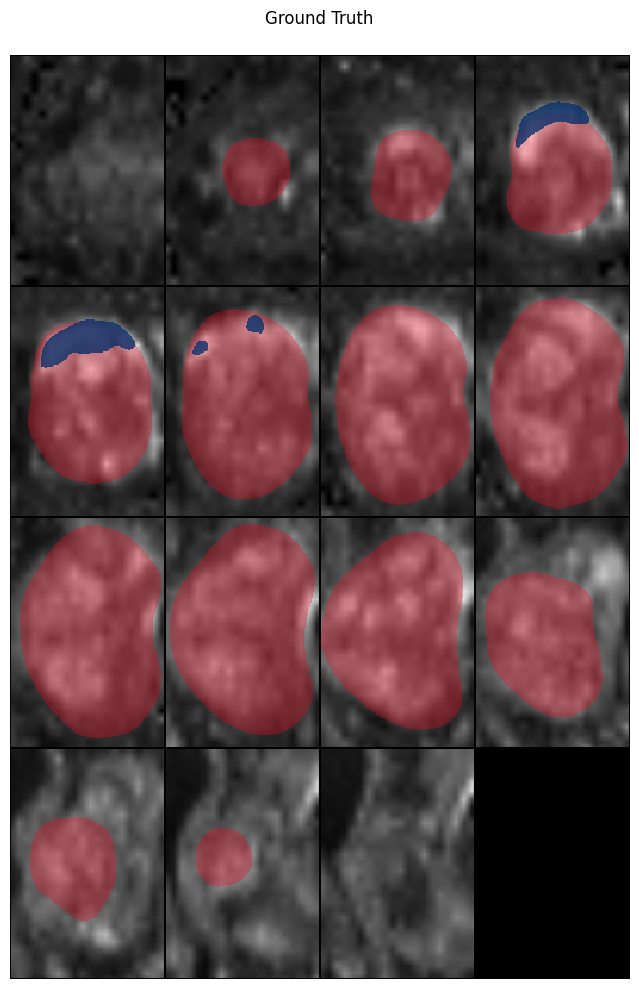

In [99]:
blended=monai.visualize.utils.blend_images(images['dwi'],images['zones'], alpha=0.3, cmap='hsv', rescale_arrays=True, transparent_background=True)
blended_2=monai.visualize.utils.blend_images(blended,images['label'], alpha=0.8, cmap='Blues', rescale_arrays=True, transparent_background=True)
monai.visualize.matshow3d(
    volume=blended_2,
    fig=None, title="Ground Truth",
    figsize=(10, 10),
    every_n=1,
    frame_dim=-1,
    show=True,
    channel_dim=0
)
plt.show()

In [103]:
# Saving nnDetection Format
data_path = '/nvmescratch/ceib/Prostate/nnDetection/det_data'
project_name = 'Task103_PICAIData'

# Create the folders
train_images_folder = os.path.join(data_path, project_name, 'raw_splitted', 'imagesTr')
train_labels_folder = os.path.join(data_path, project_name, 'raw_splitted', 'labelsTr')

os.makedirs(train_images_folder, exist_ok=True)
os.makedirs(train_labels_folder, exist_ok=True)

# Save the images and labels
for i, row in df.iterrows():
    # Save the images
    images = monai.transforms.LoadImaged(keys=['t2w','adc','dwi','zones','label'],ensure_channel_first = True,image_only=True)(row)
    images = monai.transforms.ResampleToMatchd(keys=["adc", "dwi", "zones", "label"], key_dst="t2w", mode=("bilinear", "bilinear", "nearest", "nearest"))(images)  # Resample images to t2 dimension
    images = monai.transforms.CropForegroundd(keys=['t2w','adc','dwi','zones','label'], source_key='zones',allow_smaller=False, margin=(0,0,1), k_divisible=(64,64,1))(images)
    
    images['t2w'].meta['filename_or_obj'] = os.path.join(train_images_folder, f"case{i}.nii.gz")
    images['adc'].meta['filename_or_obj'] = os.path.join(train_images_folder, f"case{i}.nii.gz")
    images['dwi'].meta['filename_or_obj'] = os.path.join(train_images_folder, f"case{i}.nii.gz")

    images['label'].meta['filename_or_obj'] = os.path.join(train_images_folder, f"case{i}.nii.gz")
    #binarize label to 0,1
    images['label'] = images['label'] > 0

    monai.transforms.SaveImaged(keys=['t2w'], meta_keys=['filename_or_obj'], output_postfix= '0000', output_dir=train_images_folder, separate_folder=False)(images)
    monai.transforms.SaveImaged(keys=['adc'], meta_keys=['filename_or_obj'], output_postfix= '0001', output_dir=train_images_folder, separate_folder=False)(images)
    monai.transforms.SaveImaged(keys=['dwi'], meta_keys=['filename_or_obj'], output_postfix= '0002', output_dir=train_images_folder, separate_folder=False)(images)
    monai.transforms.SaveImaged(keys=['label'], meta_keys=['filename_or_obj'], output_postfix= '', output_dir=train_labels_folder, separate_folder=False)(images)

    # Create case.json
    if len(images['label'].unique()) > 1:
        dict_json = {
            "instances":
            {
                "1": 0
            }
        }
    else:
        dict_json = {
            "instances":{}
        }
    with open(os.path.join(train_labels_folder, f"case{i}.json"), 'w') as json_file:
        json.dump(dict_json, json_file, indent=4)

2024-03-11 13:12:39,571 INFO image_writer.py:197 - writing: /nvmescratch/ceib/Prostate/nnDetection/det_data/Task103_PICAIData/raw_splitted/imagesTr/case0_0000.nii.gz
2024-03-11 13:12:39,656 INFO image_writer.py:197 - writing: /nvmescratch/ceib/Prostate/nnDetection/det_data/Task103_PICAIData/raw_splitted/imagesTr/case0_0001.nii.gz
2024-03-11 13:12:39,780 INFO image_writer.py:197 - writing: /nvmescratch/ceib/Prostate/nnDetection/det_data/Task103_PICAIData/raw_splitted/imagesTr/case0_0002.nii.gz
2024-03-11 13:12:39,896 INFO image_writer.py:197 - writing: /nvmescratch/ceib/Prostate/nnDetection/det_data/Task103_PICAIData/raw_splitted/labelsTr/case0.nii.gz
2024-03-11 13:12:40,739 INFO image_writer.py:197 - writing: /nvmescratch/ceib/Prostate/nnDetection/det_data/Task103_PICAIData/raw_splitted/imagesTr/case1_0000.nii.gz
2024-03-11 13:12:40,771 INFO image_writer.py:197 - writing: /nvmescratch/ceib/Prostate/nnDetection/det_data/Task103_PICAIData/raw_splitted/imagesTr/case1_0001.nii.gz
2024-03-1

In [101]:
(images['label']>0).unique()

metatensor([False,  True])

In [104]:
%%writefile /nvmescratch/ceib/Prostate/nnDetection/det_data/Task103_PICAIData/dataset.yaml

task: Task101_ProstateOwnData

name: "PICAIData" # [Optional]
dim: 3 

test_labels: False # manually splitted test set

labels: # classes of data set; need to start at 0
    "0": "Lesion"

modalities: # modalities of data set; need to start at 0
    "0": "T2w"
    "1": "ADC"
    "2": "DWI"

Writing /nvmescratch/ceib/Prostate/nnDetection/det_data/Task103_PICAIData/dataset.yaml
